## ANALISIS DE DATOS 

### Cindy Yolima Astudillo Vega 

### Predicción de dataset Titanic - Regresioón Logistica

1. Realizar un análisis exploratorio de los datos para identificar
relaciones entre variables, valores atípicos, tendencias, etc.
2. Preprocesar los datos limpiándolos, tratando valores faltantes y
transformándolos según sea necesario.
3. Seleccionar las características más relevantes para entrenar el
modelo utilizando selección de características.
4. Dividir el dataset en Train y Test para evaluar correctamente el
modelo.
5. Entrenar el modelo configurando los diferentes
hiperparámetros.
6. Evaluar el desempeño del modelo en el conjunto de Test con
métricas como precisión, recall, F1-score, etc.
7. Realizar las diferentes gráficas que permitan visualizar los
resultados del modelo.
8. Interpretar, analizar y documentar los resultados obtenidos


#### 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [48]:
import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [49]:
dataset = pd.read_csv('./Titanic-Dataset.csv')

In [50]:
dataset.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S


In [51]:
# Descripción de los datos
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Identificación de Datos Faltantes y  Valores Atípicos Fare')

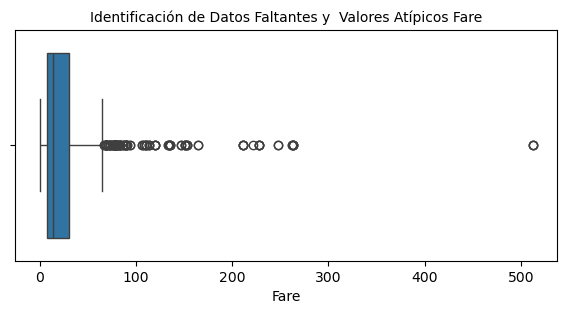

In [52]:
plt.figure(figsize=(7, 3))
sns.boxplot(x=dataset['Fare'])
plt.title('Identificación de Datos Faltantes y  Valores Atípicos Fare', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y  Valores Atípicos SibSp')

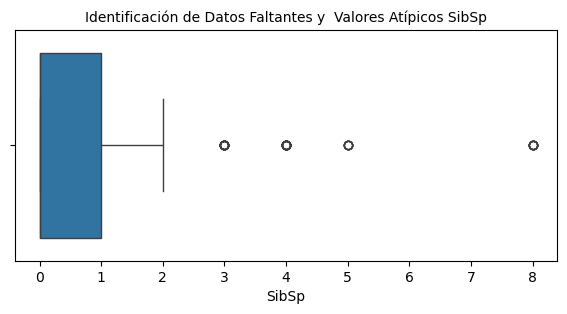

In [53]:
plt.figure(figsize=(7, 3))
sns.boxplot(x=dataset['SibSp'])
plt.title('Identificación de Datos Faltantes y  Valores Atípicos SibSp', fontsize=10 )

#### 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

In [54]:
print("Cantidad de Registros con cero en Edad: ",dataset['Age'].isin([0]).sum())
print("Cantidad de Registros nulos en Edad: ",dataset['Age'].isna().sum())
print("Cantidad de Registros con cero en Tarifa de pasajero: ",dataset['Fare'].isin([0]).sum())

Cantidad de Registros con cero en Edad:  0
Cantidad de Registros nulos en Edad:  177
Cantidad de Registros con cero en Tarifa de pasajero:  15


In [55]:
dataset['Fare']=dataset['Fare'].replace(0,dataset['Fare'].mean())

In [56]:
print("Cantidad de Registros con cero en tarifa de pasajero: ",dataset['Fare'].isin([0]).sum())

Cantidad de Registros con cero en tarifa de pasajero:  0


In [57]:
dataset = dataset.dropna(subset=['Age'])

In [58]:
print("Cantidad de Registros nulos en Edad: ",dataset['Age'].isna().sum())

Cantidad de Registros nulos en Edad:  0


In [59]:

nivel_minimo=0
nivel_maximo=2
Total_Atipicos=((dataset['SibSp']<nivel_minimo)|(dataset['SibSp']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 35


In [60]:
dataset=dataset[(dataset['SibSp']<nivel_maximo)&(dataset['SibSp']>nivel_minimo)]

In [61]:
Total_Atipicos=((dataset['SibSp']<nivel_minimo)|(dataset['SibSp']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [62]:
#Revision de datos 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 0 to 874
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        64 non-null     object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


#### 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.


##### Caracteriticas de interes:

Survived: Si el pasajero sobrevivió o no (0 = no sobrevivió - 1 = si sobrevivió)



In [63]:
dataset['Survived'].value_counts()


Survived
1    97
0    86
Name: count, dtype: int64

In [68]:
dataset[['Survived']].head(40)


,Survived
0,0
1,1
3,1
9,1
10,1
13,0
18,0
25,1
34,0
35,0


#### 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo

In [69]:
X = dataset.drop('Survived',axis=1) 
X = X.drop('PassengerId',axis=1)
X = X.drop('Name',axis=1)
X = X.drop('Ticket',axis=1)
X = X.drop('Cabin',axis=1)

dataset['Sex'] = dataset['Sex'].replace({'male': 0, 'female': 1})

dataset['Embarked'] = dataset['Embarked'].replace({'C': 0, 'Q': 1, 'S':2})

Y = dataset['Survived'] 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [70]:
print (X_train)

     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
348       3    0   3.0      1      1   15.900         2
440       2    1  45.0      1      1   26.250         2
546       2    1  19.0      1      0   26.000         2
215       1    1  31.0      1      0  113.275         0
224       1    0  38.0      1      0   90.000         2
..      ...  ...   ...    ...    ...      ...       ...
754       2    1  48.0      1      2   65.000         2
40        3    1  40.0      1      0    9.475         2
230       1    1  35.0      1      0   83.475         2
781       1    1  17.0      1      0   57.000         2
518       2    1  36.0      1      0   26.000         2

[137 rows x 7 columns]


In [71]:
print (Y_train)

348    1
440    1
546    1
215    1
224    1
      ..
754    1
40     0
230    1
781    1
518    1
Name: Survived, Length: 137, dtype: int64


#### 5. Entrenar el modelo configurando los diferentes hiperparámetros

In [72]:
#modelo de regresion logistica
modelo_regresion = LogisticRegression(solver = "liblinear") 
modelo_regresion.fit (X_train , Y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test)

In [73]:
print (Prediccion)

[1 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 1 1 1 1 0 1 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0
 0 1 1 0 0 0 0 0 1]


#### 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc

In [74]:
print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.75      0.82      0.78        22
           1       0.82      0.75      0.78        24

    accuracy                           0.78        46
   macro avg       0.78      0.78      0.78        46
weighted avg       0.79      0.78      0.78        46



#### 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

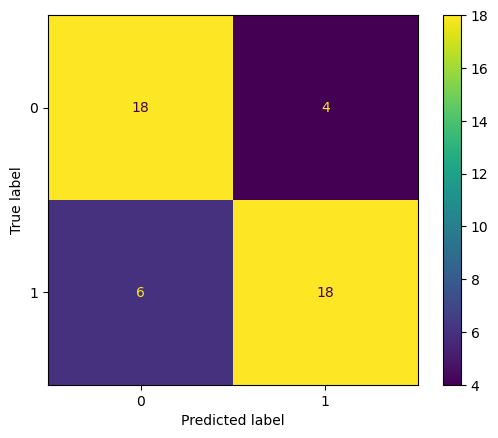

In [75]:
#Matrix de Confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

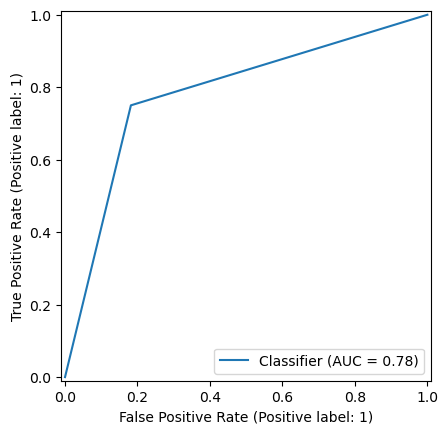

In [76]:
#curva de precisión 
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()


#### 8. Interpretar, analizar y documentar los resultados obtenidos


Precisión: Representa la proporción de predicciones correctas dentro de todas las clasificaciones positivas realizadas por el modelo. Para la clase 'Survived', la precisión alcanza un 82%, lo que significa que el modelo acertó en el 82% de los casos que identificó como sobrevivientes.

Recall (Sensibilidad): Mide el porcentaje de casos positivos reales que el modelo identificó correctamente en relación con el total de casos positivos presentes en el conjunto de datos. En el caso de la clase 'Survived', el Recall es del 75%, lo que indica que el modelo detectó correctamente al 75% de las personas que sobrevivieron.

F1 Score: Combina la precisión y el recall en un único valor, proporcionando una evaluación equilibrada del rendimiento del modelo. Para la clase 'Survived', el F1 Score es 0.78, lo cual refleja que el modelo tiene una buena capacidad para identificar sobrevivientes de manera precisa y completa.

Soporte (Support): Se refiere al número de ejemplos reales de cada categoría en el conjunto de datos. Para 'Survived', el soporte es de 24, indicando que hay 24 casos reales de personas que sobrevivieron en el conjunto analizado.

#### A partir de la Matriz de Confusión se observa:

Verdaderos Negativos (TN): Corresponden a los casos correctamente identificados como negativos, con un total de 18 observaciones.

Verdaderos Positivos (TP): Son los casos correctamente clasificados como positivos, también con un total de 18 observaciones.

Falsos Positivos (FP): Representan los casos clasificados erróneamente como positivos cuando realmente eran negativos, con 4 instancias en esta categoría.

Falsos Negativos (FN): Indican los casos reales positivos que el modelo clasificó incorrectamente como negativos, sumando un total de 6 observaciones.

#### Curva de Precisión del Modelo:

AUC (Área Bajo la Curva): Tiene un valor de 0.78, lo que implica que el modelo tiene un 78% de efectividad en distinguir entre las clases positivas y negativas a través de diferentes umbrales de clasificación. Aunque este valor refleja un desempeño adecuado, no alcanza la perfección, por lo que sería recomendable evaluar otras métricas y realizar ajustes en el modelo o los datos para optimizar su desempeño.